## Introduction to Python Exercises

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel → Restart) and then run all cells (in the menubar, select Cell → Run All).  You can speak with others regarding the assignment but all work must be your own. 


### This is a 30 point assignment graded from answers to questions and automated tests that should be run at the bottom. Be sure to clearly label all of your answers and commit final tests at the end. If you attempt to fake passing the tests you will receive a 0 on the assignment and it will be considered an ethical violation. (Note, not all questions have tests).


In [1]:
NAME = "Emma Prescott"

## Exercise-Twitter API

(1) Describe what an API is and what importance Twitter's API is. 

In [2]:
q1_question= """
1) Describe what an API is and what importance Twitter's API is.
"""
q1_answer=""" An API or Application-Programming Interface is a set of procedures/guidelines
that tells/allows one program/software to interact with another (ie. perform task, access data, etc).

Twitter's API allows developers/innovators to access information on public profiles. 
This is important because it creates an ecosystem of developers/innovators that utilize the data
to create solutions and make the platform better/more valuable.
"""

## Exercise-Twitter API

(2) Using code from the course repository involving the Twitter API, download the profile for the following users: tensorflow, DeepLearningHub, your TwitterID.

Here is a set-by-step that should help. <br>

**Before you begin, make sure you follow instructions from class to create your Twitter application and can run the example twitter notebook using your configuration**

(a) Take the necessary functions from the notebook and move them to a module.<br>
(b) Confirm that the existing code works with your modules. <br>
(c) Copy the module file into this directory. <br>
(d) Copy the module import statement and other code necessary to call the twitter API to this notebook. <br>
(e) Add your twitterid name to the list of profiles in (screen_names.csv). <br>
(f) Copy over your configuration file to twitter/config.yaml <br>
(g) Use your code and generate a json file in /data/profiles/<date>-user-profiles.json.  This will be tested later. <br>
(h) Set your filename below. 



In [3]:
#(d) copy necessary code from class notes
import pandas as pd
import ruamel.yaml #A .yaml file 
#This is your configuration file. 
twitter_yaml='./twitter/config.yaml'
with open(twitter_yaml, 'r') as yaml_t:
    cf_t=ruamel.yaml.round_trip_load(yaml_t, preserve_quotes=True)

#(e) add twitterid names to screen_name.csv
df=pd.read_csv(cf_t['config']+"/"+cf_t['file'])
print(df)
df.loc[0, 'screen_name'] = 'tensorflow'
df.loc[1, 'screen_name'] = 'DeepLearningHub'
df.loc[2, 'index'] = 3
df.loc[2, 'screen_name'] = 'emmaginary121'
print(df)

   index      screen_name
0      1  jasonkuruzovich
1      2    analyticsdojo
   index      screen_name
0    1.0       tensorflow
1    2.0  DeepLearningHub
2    3.0    emmaginary121


In [4]:
import functions
twitter = functions.create_twitter_auth(cf_t)
profiles_fn = functions.get_profiles(twitter, df['screen_name'], cf_t)

Searching twitter for User profile:  tensorflow
User found. Total tweets: 430
Searching twitter for User profile:  DeepLearningHub
User found. Total tweets: 2431
Searching twitter for User profile:  emmaginary121
User found. Total tweets: 0


In [5]:
#Update this for your filename replacing ? with actual numbers.
twitterfilename= '2018-10-04-user-profiles.json'

## Exercise - Seaborn
(3) Create the following figure using the Titanic dataset (included with Seaborn).  
![](./fig/hm4-1.png)



In [6]:
import seaborn as sns
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
BoxAge = sns.boxplot(x=titanic['age'])

In [7]:
q3b_answer=""" Given the box plot graph above, we're able to identify the following information
*Note: the following numbers are just estimations as viewed on the graph - not exact
minimum value = ~1 years old
Q1 (25 percentile) = ~20 years old
median value = ~high 20s, maybe 27/28 years old
Q3 (75 percentile) = ~high 30s, maybe 37/38/ years old
maximum value = ~mid 60s, maybe 65 years old
IQR (Q3-Q1) = ~high teens, maybe 18 years old
Addtionally, there are outliers on the right side that are past the Q3+1.5*IQR mark
"""

(4a) Create the following figure using the Titanic dataset (included with Seaborn). 
![](./fig/hm4-2.png)



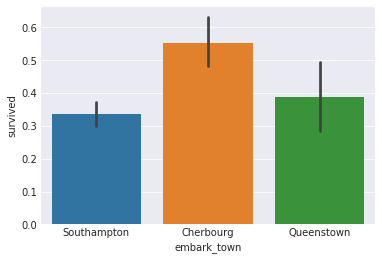

In [8]:
import statistics as stats
sns.set_style('darkgrid')
BarAge = sns.barplot(x='embark_town', y='survived', data=titanic)

In [9]:
q4b_answer="""Given the graph above, we're able to see what percent/mean of passengers survived in
relation to where he/she boarded the ship. The grey bar indicates the uncertainty/%error around the
estimation. We're able to assume these are the percent of those whom surived because the values are
1 or 0, so by finding the mean, you're essentially dividing number survived over total number of 
passengers. These are just estimations based on the graph above (again not exact numbers):
Southampton ~33% survived
Cherbourg ~55% survived
Queenstown ~39% survived
"""

(5a) Create the following figure using the Titanic dataset (included with Seaborn). 
![](./fig/hm4-3.png)





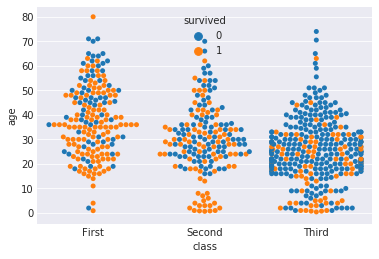

In [10]:
SwarmClass = sns.swarmplot(x='class', y='age', hue='survived', data=titanic)

In [11]:
q5b_answer="""A swarmplot draws a scatterplot with no overlapping points, which is a representation
of the distribution of ages within each class. As you can see:
First class: The ages appear to be relatively normally distributed
Second class: The ages are slightly more concentrated to ages below 40 years old.
Third class: A very high concentrationof ages are between mid-teens to high-30s.
"""

(6b) Create the following figure using the Titanic dataset (included with Seaborn). 
![](./fig/hm4-4.png)



/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


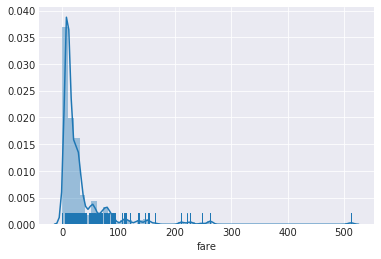

In [12]:
DistFare = sns.distplot(titanic['fare'], kde=True, rug=True)

In [13]:
q6b_answer="""The graph above illistrates the distribution/density of each fare paid. As you can 
see the distribution of fares is positively/rightly skewed since the peak/majority is on the left
side (where the fairs are less than about $50)
"""

## Exercise-Beautiful Soup
Imagine you would like to write a simple python script that pulls in data from https://webrobots.io/kickstarter-datasets/.  To do that, we would have to get all the links.  Here is some starter code that will download the url into a soup object. 



In [14]:
#This will pull the data
from bs4 import BeautifulSoup
import requests
response = requests.get("https://webrobots.io/kickstarter-datasets/")
html_doc = response.text
soup = BeautifulSoup(html_doc, 'html.parser')
#print(soup.prettify())



### (7) Describe where in the html the links occur. 

In [15]:
q7_answer="""The links occur between the <a href= "https://... "> in the html code. The <a> is an
html tag that identifies a hyperlink
"""

(8) Before we try to get the links, lets make sure we can parse the web page. Set the value of the variable `page_title` equal to the contents inside the <title> </title> tag.  The title tag should not be included. 



In [16]:
page_title = soup.title.string


(9) The code below will pull out the text for one of the links. Could you create a list called `newlist` that pulls in the link for all of the files. [Hint: use a for loop to process all of the links.]

```
import re #This is the regular expressions. 
links = re.findall('https://s3.amazonaws.com/weruns/forfun/Kickstarter.*\.zip', html_doc) #This is the pattern we want
x=links[0]  #here we are setting the value equal to the first link. 
print(x[117:208])  #Here we are parsing the string using the relevant position. 

```




In [17]:
import re
newlist=[]
links=re.findall('https://s3.amazonaws.com/weruns/forfun/Kickstarter.*\.zip', html_doc)
for i in range(len(links)):
    x=links[i]
    newlist.append(x[117:208])

### Regular Expressions

Did you know you just used regular expressions? This is a useful way of parsing through string data. 

(10) There are a lot of things that we can do with regular expressions.  For the input `text`, please complete the following transformations. 

- Change `text` to lower case.
- Remove all emails and substitute them with '--'
- Remove all digits and replace with *. 
- Split the lines and put them into a list called `textlines`.

The resulting list should be:
```
['the test score is ** with the email -- for mgmt*****.',
 'the test score is ** with the email -- for mgmt*****.']
```



In [18]:
import re
text="""The test score is 85 with the email john@rpi.edu for MGMT33223.
The test score is 83 with the email jim@rpi.edu for MGMT33223.
"""
email = re.compile('\w+@\w+\.[a-z]{3}')#finds text that resembles an email
newtext = email.sub('--', text)
numbers = re.compile('\d')#finds text that are numbers
newtext = numbers.sub('*', newtext)
textlines = newtext.lower().splitlines()

### This Loads a Testing Array 
- This runs tests against your b array.  If you complete the assingment correctly, you will pass the tests. 
- **If you attempt to fake passing the tests you will receive a 0 on the assignment and it will be considered an ethical violation.**

In [19]:
#Output your answers
answers= [q1_question, q1_answer, q3b_answer, q4b_answer, q5b_answer, q6b_answer, q7_answer]
with open('answers.txt', 'w') as outfile:   #The "with" incorporates an open and close of file. 
    outfile.write("\n".join(answers))

In [20]:
!conda install -c conda-forge --yes ipython_unittest 
#if you didn't install last time. 

Solving environment: done

# All requested packages already installed.



In [21]:
%load_ext ipython_unittest
#this enables running tests.

In [22]:
#This processes some of your files for use in the tests. 

path='data/profiles/2018-10-03-user-profiles.json'
names=[]
urls=[]

import json   #This imports the JSON
from pprint import pprint  #This will print the file in a nested way. 

with open(path) as data_file:   #The "with" incorporates an open and close of file.   
    for line in data_file:
        #print(line)
        j = json.loads(line)
        names.append(j['name'])
        urls.append(j['url'])
pprint(j) #Pretty printing (pprint) makes it easier to see the nesting of the files. '''



{'contributors_enabled': False,
 'created_at': 'Tue Sep 25 14:00:11 +0000 2018',
 'default_profile': True,
 'default_profile_image': False,
 'description': '',
 'entities': {'description': {'urls': []}},
 'favourites_count': 0,
 'follow_request_sent': False,
 'followers_count': 0,
 'following': False,
 'friends_count': 0,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 1044587371759587328,
 'id_str': '1044587371759587328',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 0,
 'location': '',
 'name': 'emma',
 'notifications': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_image_url': 'http://pbs.twimg.com/profile_images/1044588003254063104/azffHSuB_normal.jpg',
 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1044588003254063104/azffHSuB_normal.jpg',
 'profile_link_color': '1DA1F2',
 'prof

In [23]:
%%unittest_main
class TestHm4(unittest.TestCase):
    def test_twitter1(self):
        self.assertEqual((urls[0]), "https://t.co/gxgTGHp5yO")
    def test_twitter2(self):
        self.assertEqual(names[1], "Deep Learning Hub")
    def test_twitter3(self):
        self.assertEqual(len(names), 3)
    def test_soup1(self):
        self.assertEqual(page_title, "Kickstarter Datasets – Web Scraping Service")
    def test_soup2(self):
        self.assertEqual(newlist[5][0:65], 'https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_20')
    def test_regexpress(self):
        self.assertEqual(textlines[0], 'the test score is ** with the email -- for mgmt*****.')




Success

......
----------------------------------------------------------------------
Ran 6 tests in 0.000s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>